# This is a notebook for Random Forest  training a model to be able to categorize fake vs real news

In [1]:
import re
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


Load the data formating it correctly for easy use.

In [2]:
# Load the datasets formating them correctly for ease of use
train_data = pd.read_csv(
    r"..\training_data_lowercase.csv",
    sep='\t',  # TAB serparator
    header=None,
    names=['label', 'title']
)

test_data = pd.read_csv(
    r"..\testing_data_lowercase_nolabels.csv",
    sep='\t',  # TAB serparator
    header=None,
    names=['label', 'title']
)

print(train_data.head())
print(test_data.head())

   label                                              title
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...
  label                                              title
0     2  copycat muslim terrorist arrested with assault...
1     2  wow! chicago protester caught on camera admits...
2     2   germany's fdp look to fill schaeuble's big shoes
3     2  mi school sends welcome back packet warning ki...
4     2  u.n. seeks 'massive' aid boost amid rohingya '...


Apply TF-IDF to the dataset to conver the words into numerical values for model training

In [3]:
# TF-IDF Vectorization (Only fit on training data)
tfidf_vectorizer = TfidfVectorizer()
X_train_val, X_test, y_train_val, y_test = train_test_split(train_data['title'], train_data['label'], test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Fit vectorizer only on training data
tfidf_vectorizer.fit(X_train)

# Transform all datasets consistently
X_train = tfidf_vectorizer.transform(X_train)
X_val = tfidf_vectorizer.transform(X_val)
X_test = tfidf_vectorizer.transform(X_test)

# Initialize the logicti regresion model
model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10,  # Limit depth
    min_samples_split=5,  # Require more samples to split
    min_samples_leaf=2,  # Require more samples in leaves
    random_state=42
)
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Predict on test set
y_test_pred = model.predict(X_test)
# Predict on training set
y_train_pred = model.predict(X_train)

# Evaluate the model
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print(f"Validation R²: {r2_score(y_val, y_val_pred)}")

print("\n" + "-"*50 + "\n")

print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print(f"Test R²: {r2_score(y_test, y_test_pred)}")

Validation Accuracy: 0.871468306250915
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      3510
           1       0.88      0.85      0.87      3321

    accuracy                           0.87      6831
   macro avg       0.87      0.87      0.87      6831
weighted avg       0.87      0.87      0.87      6831

Validation R²: 0.4854793505200008

--------------------------------------------------

Test Accuracy: 0.8786414873371395
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      3529
           1       0.89      0.86      0.87      3302

    accuracy                           0.88      6831
   macro avg       0.88      0.88      0.88      6831
weighted avg       0.88      0.88      0.88      6831

Test R²: 0.5140292967553262


Print confusion mattrix.

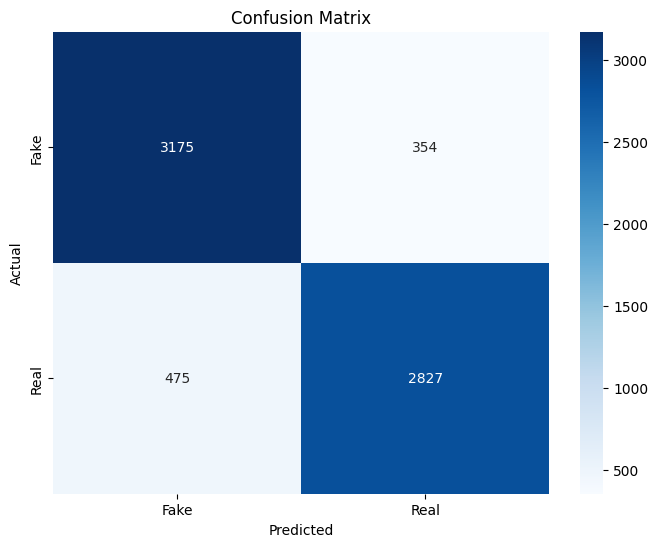

In [4]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [5]:
X_test_unlabeled = tfidf_vectorizer.transform(test_data['title'])

# Predict labels for the unlabeled data
predicted_labels = model.predict(X_test_unlabeled)
test_data['label'] = predicted_labels
print(test_data.head())

   label                                              title
0      1  copycat muslim terrorist arrested with assault...
1      0  wow! chicago protester caught on camera admits...
2      1   germany's fdp look to fill schaeuble's big shoes
3      0  mi school sends welcome back packet warning ki...
4      1  u.n. seeks 'massive' aid boost amid rohingya '...


In [6]:
# Make sure title is string, not list
test_data['title'] = test_data['title'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
# Export respecting original format
test_data[['label', 'title']].to_csv(
    r'rf_test_data.csv',
    sep='\t',  # TAB separator
    index=False,
    header=False  # No column names
)
print("\n:white_check_mark: Predictions exported successfully in correct format!")


:white_check_mark: Predictions exported successfully in correct format!
